In [88]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns        #para el gráfico del histograma
import scipy as sc
import pandas as pd

# Introducción a la estadística, Ajuste de distribuciones 

1. Generar N datos asociados a una distribución normal empleando la libreria random de numpy.

2. Construya un histograma con los datos de la distribución 

3. Con la libreria stat de scipy realizar un fit a la distribucion normal que se generó con los números aleatorios, utilizar el metodo fit dentro de la libreria de stat.

4. Cuando no conocemos la distribución de datos, es recomendable buscar la mejor distribucion estadistica posible, supogamos que queremos analizar el mejor fit de multiples  distribuciones estadisticas, asi que podemos emplear la libreria Fitter para buscar la mejor distribución cuando determinados el error cuadratico medio, como sigue: 


```
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria, que podemos emplear para realizar ajustes mas generalizados.

Realizar un fit con la distribucion gamma, lognorm, beta, norm para la distribución de datos estadísticos. Ahora que ya sabes cual es la mejor, emplea la libreria stat para realizar nuevamente el fit, de esta manera puedes usar todos los metodos de la libreria stat.



5. Ahora que ya sambemos realizar un fit de distribuciones estadístiscas con datos sinténticos, vamos a la práctica de un problema real.

Los archivos pdf, puede ser binarizados, un ejemplo de archivo binario es dado en el siguiente [link](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Actividades_clase/binary.txt).  Analicemos la distribucion estadistica de los datos, de la siguiente manera:

a. Realizar la lectura del archivo binario 
b. Agrupar los datos del pdf en grupos de 2, 3, 4, 5, 6, 7, 8 bit. Asociar un entero a cada uno de los bit, agrupando de la siguiente forma:

Supongamos que x es el archibo pdf representado de la siguiente forma 

x = "0111001011111101010101010101"

Para la agrupacion de 2, 3, 4, 5, 6, n bit, podemos agrupar los datos de a dos, de forma consecutiva, o en grupos de a 2 sin repetición. 
  1. Ejemplo de  agrupacion sin repeticion de 2 bit  
    - Una posible agrupacion de 2 bit es : {"01","11","10"...}
    - Una posible agrupacion de 3 bit es : {"011","100","10"...}
  
  2. Agrupacion con repetecion de a 2 bit:
    - Una posible agrupacion de 2 bit es : {"01","11","11"...}
    - Una posible agrupacion de 3 bit es : {"011","111","110"...}


Agrupando de cualquiera de las dos formas, podemos generar una lista de números enteros, asociado a cada número binario, y con ello construir un histogramas. 


c. Constriur histogramas para la forma 1 de agrupación, para 2, 3, 4, 5, 6, 7, 8 bit.


d. realizar un fit para cada unas de las distribuciones estadisticas.



Ayuda:

- De la siguiente forma se puede agrupar los datos y asociar el valor entero agrupando de la forma 1. 

```python 
import textwrap

a = "10110101010101"

bin_string = a
bin_string = bin(int(bin_string, 2))[2:]
split = 2
s = textwrap.wrap(bin_string,2)

#Entero ascoiado 
b = int(s[0], 2)


```


- Una forma más avanzada de agrupar los datos con la funcion map, de programacion funcional, puede  es dada a continuación:

```python 
state="111111111"
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 2
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos = ["".join (map (str, i)) for i in s]
```




#solucion

1. Generar N datos asociados a una distribución normal empleando la libreria random de numpy.



In [169]:
N = 1000
mu = 0
sigma = 0.2
puntos_random = np.random.normal(mu, sigma, N)                #para obtener una distribución normal, ponemos el valor de la media, el sigma que es la desviacion estándar, y el numero de datos que queremos obtener
df = pd.DataFrame()
df['data'] = pd.DataFrame(puntos_random)

2. Construya un histograma con los datos de la distribución 

(-0.5, 0.5)

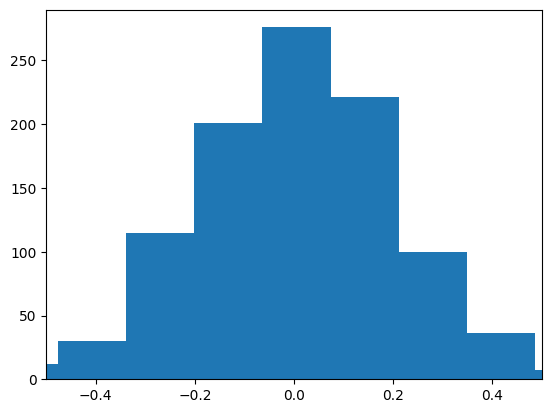

In [170]:
plt.hist(df.data)
plt.xlim(-0.5, 0.5)

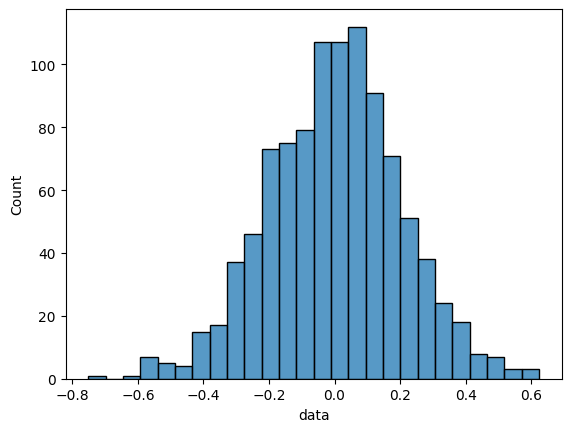

In [171]:
# Crear el histograma utilizando seaborn
sns.histplot(df.data)                                   #bins es para seleccionar los datos que van a entrar en nuestro conteo

# Mostrar el histograma
plt.show()


3. Con la libreria stats de scipy realizar un fit a la distribucion normal que se generó con los números aleatorios, utilizar el metodo fit dentro de la libreria de stat.

In [172]:
from scipy.stats import norm

In [173]:
#FIT

media, desv_est = norm.fit(puntos_random)       

In [174]:
N1 = 10000
dominio = np.linspace(min(df.data), max(df.data), N1)

FIT = norm.pdf(dominio, media, desv_est)

In [177]:
#FitError,
df_fit=pd.DataFrame()
df_fit["dominio"]=dominio
df_fit["fit"]=FIT

<Axes: xlabel='data', ylabel='Count'>

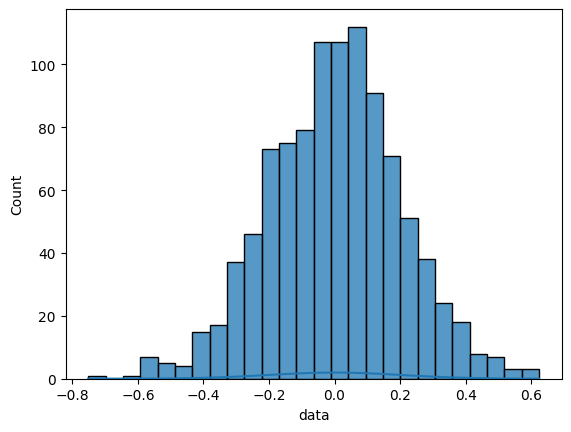

In [178]:
fig, ax = plt.subplots()

sns.histplot(df.data, ax=ax)
sns.lineplot(x="dominio", y="fit", data=df_fit)


#quedan asi sin normalizar #la curva esta abajo

Text(0, 0.5, 'Numero de apariciones')

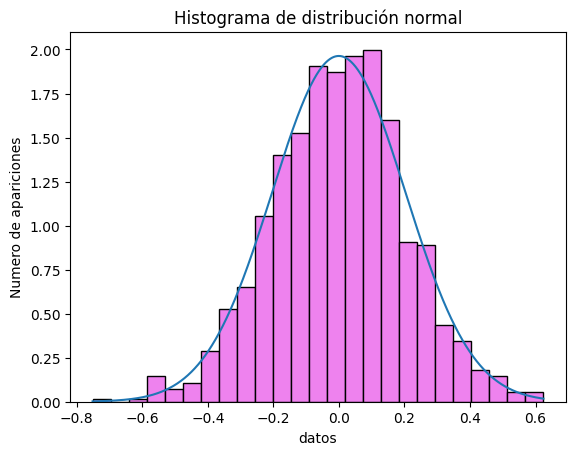

In [179]:
plt.hist(df.data, bins=25, color='violet', edgecolor='black', density=True)         #bins es para seleccionar los datos que van a entrar en nuestro conteo
plt.plot(dominio, FIT)

plt.title('Histograma de distribución normal')
plt.xlabel('datos')
plt.ylabel('Numero de apariciones')

4. Cuando no conocemos la distribución de datos, es recomendable buscar la mejor distribucion estadistica posible, supogamos que queremos analizar el mejor fit de multiples  distribuciones estadisticas, asi que podemos emplear la libreria Fitter para buscar la mejor distribución cuando determinados el error cuadratico medio, como sigue: 


```
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria, que podemos emplear para realizar ajustes mas generalizados.

Realizar un fit con la distribucion gamma, lognorm, beta, norm para la distribución de datos estadísticos. Ahora que ya sabes cual es la mejor, emplea la libreria stat para realizar nuevamente el fit, de esta manera puedes usar todos los metodos de la libreria stat.

In [180]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fitting 7 distributions: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]


(39317723.03778776, 187.6016496840636, -585145.2430791436, 585148.0347636689)

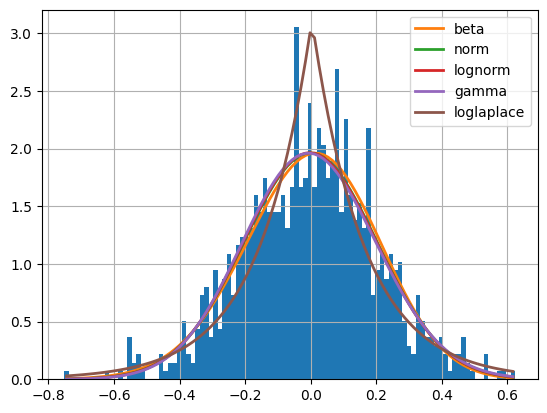

In [181]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df.data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          'arcsine',
                          'loglaplace',
                          'halfcauchy'])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

In [ ]:
get_distributions()


5. Ahora que ya sambemos realizar un fit de distribuciones estadístiscas con datos sinténticos, vamos a la práctica de un problema real.

Los archivos pdf, puede ser binarizados, un ejemplo de archivo binario es dado en el siguiente [link](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Actividades_clase/binary.txt).  Analicemos la distribucion estadistica de los datos, de la siguiente manera:

a. Realizar la lectura del archivo binario 
b. Agrupar los datos del pdf en grupos de 2, 3, 4, 5, 6, 7, 8 bit. Asociar un entero a cada uno de los bit, agrupando de la siguiente forma:

Supongamos que x es el archibo pdf representado de la siguiente forma 

x = "0111001011111101010101010101"

Para la agrupacion de 2, 3, 4, 5, 6, n bit, podemos agrupar los datos de a dos, de forma consecutiva, o en grupos de a 2 sin repetición. 
  1. Ejemplo de  agrupacion sin repeticion de 2 bit  
    - Una posible agrupacion de 2 bit es : {"01","11","10"...}
    - Una posible agrupacion de 3 bit es : {"011","100","10"...}
  
  2. Agrupacion con repetecion de a 2 bit:
    - Una posible agrupacion de 2 bit es : {"01","11","11"...}
    - Una posible agrupacion de 3 bit es : {"011","111","110"...}


Agrupando de cualquiera de las dos formas, podemos generar una lista de números enteros, asociado a cada número binario, y con ello construir un histogramas. 


c. Constriur histogramas para la forma 1 de agrupación, para 2, 3, 4, 5, 6, 7, 8 bit.


d. realizar un fit para cada unas de las distribuciones estadisticas.



Ayuda:

- De la siguiente forma se puede agrupar los datos y asociar el valor entero agrupando de la forma 1. 

```python 
import textwrap

a = "10110101010101"

bin_string = a
bin_string = bin(int(bin_string, 2))[2:]
split = 2
s = textwrap.wrap(bin_string,2)

#Entero ascoiado 
b = int(s[0], 2)


```


- Una forma más avanzada de agrupar los datos con la funcion map, de programacion funcional, puede  es dada a continuación:

```python 
state="111111111"
List_binario = "".join(list(map(lambda x: str(x), state)))
split = 2
s = [list(state[i:i+split]) for i in range(0, len(state)-split+1)]
binario_grupos = ["".join (map (str, i)) for i in s]
```


